In [1]:
# Minimal demonstration of SMC

In [3]:
%load_ext autoreload
%autoreload 2
import pymc4 as pm
import tensorflow as tf
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# np.inf stacks TOFO
inf = 2000.

In [4]:
@pm.model()
def model():
    m = yield pm.Normal("m", 0., [1., 4.])
    #d = yield pm.Potential(tf.where(m[...,0] < 0., -np.inf, 1.))
    n = yield pm.Normal("n", 0., 2., observed=1.)
    return m

In [5]:
trace = pm.sample(model(), progressbar=True)

100%|██████████| 1000/1000 [00:08<00:00, 117.10it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ddc6f4cc0>,
      dtype=object)

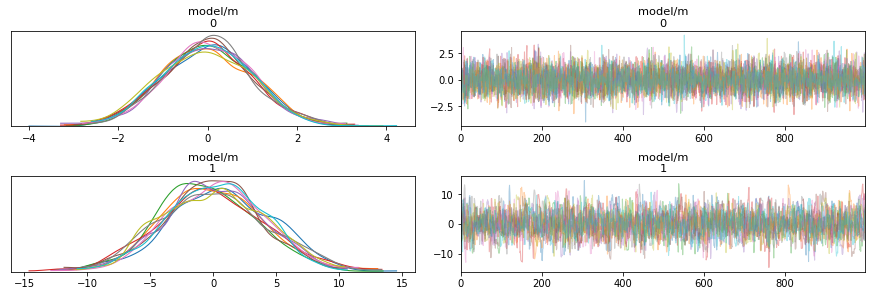

In [6]:
import arviz as az
az.plot_trace(trace)

In [8]:
x = pm.sample_smc(model())

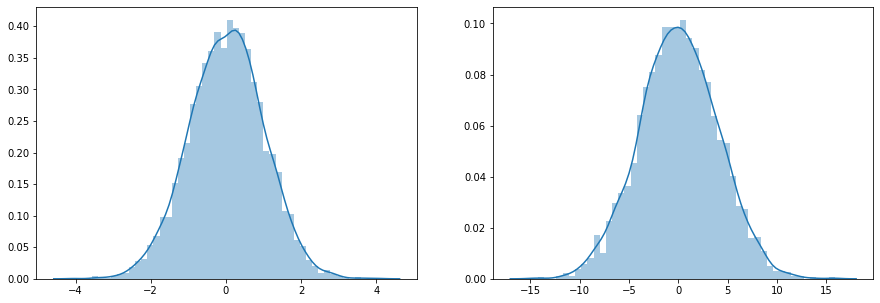

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(x[0][:,0], ax=ax[0])
sns.distplot(x[0][:,1], ax=ax[1])

In [1]:
%load_ext autoreload
%autoreload 2
import pymc4 as pm
import tensorflow as tf
import numpy as np

In [2]:
@pm.model()
def model():
    n = yield pm.Normal("n", 0., 1., batch_stack=3)
    m = yield pm.Normal("m", 0., 1., observed=[2., 3., 4.], batch_stack=3)
    return n

In [3]:
tk = pm.sample_smc(model(), use_auto_batching=False)

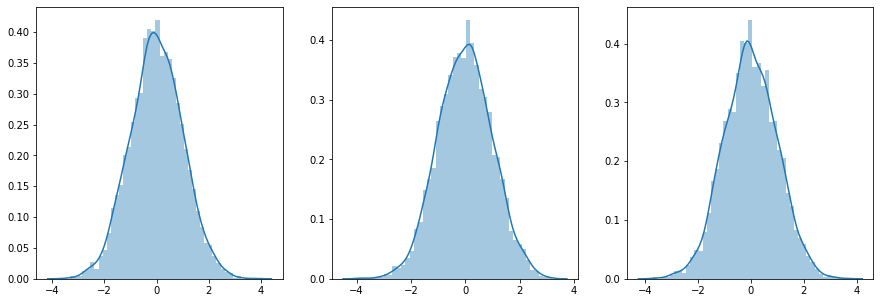

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15,5))
sns.distplot(tk[0][:,0], ax=ax[0])
sns.distplot(tk[0][:,1], ax=ax[1])
sns.distplot(tk[0][:,2], ax=ax[2])

In [32]:
pm.Normal("n", 0., [1., 1., 1.])._distribution

<tfp.distributions.Normal 'Normal' batch_shape=[3] event_shape=[] dtype=float32>

In [6]:
tk = pm.sample(model(), use_auto_batching=True)